In [1]:
pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.neighbors import NearestNeighbors                  
from sklearn.cluster import KMeans, DBSCAN                       
from sklearn.metrics import silhouette_score, davies_bouldin_score 
from sklearn.decomposition import PCA                            
import os               
from datetime import datetime 
import warnings         
warnings.filterwarnings('ignore')
import numpy as np


In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [4]:
# Load Customers.csv
customers = pd.read_csv(r"C:\Users\yadav\Videos\Customers.csv")
products = pd.read_csv(r"C:\Users\yadav\Videos\Products.csv")
transactions = pd.read_csv(r"C:\Users\yadav\Videos\Transactions.csv")

In [5]:
customers.head(20)


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
5,C0006,Brittany Palmer,South America,2024-01-07
6,C0007,Paul Graves,Asia,2022-06-18
7,C0008,David Li,North America,2024-01-13
8,C0009,Joy Clark,Europe,2023-08-14
9,C0010,Aaron Cox,Europe,2022-12-15


In [6]:
products.head() 


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [7]:
transactions.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68


In [8]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])


In [9]:
# 1. Join Transactions with Customers on CustomerID
transactions_with_customer = pd.merge(transactions, customers, on='CustomerID', how='left')


In [10]:
final_df= pd.merge(transactions_with_customer, products, on='ProductID', how='left')


In [11]:
final_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


# Task 3: Customer Segmentation / Clustering

In [51]:
customers = pd.read_csv(r"C:\\Users\\yadav\\Videos\\Customers.csv")
products = pd.read_csv(r"C:\\Users\\yadav\\Videos\\Products.csv")
transactions = pd.read_csv(r"C:\\Users\\yadav\\Videos\\Transactions.csv")

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
final_df= pd.merge(pd.merge(transactions, customers, on='CustomerID', how='left'), products, on='ProductID', how='left')




In [52]:
customer_features_df = final_df.groupby('CustomerID').agg(
    Region=('Region', 'first'),
    TransactionFrequency=('TransactionID', 'count'),
    AvgTransactionValue=('TotalValue', 'mean'),
    TotalTransactionValue=('TotalValue', 'sum')
)

encoder = OneHotEncoder(sparse_output=False)
region_encoded = encoder.fit_transform(customer_features_df[['Region']])
region_df = pd.DataFrame(region_encoded,
                           columns=encoder.get_feature_names_out(['Region']),
                           index=customer_features_df.index)

customer_features_df = pd.concat([customer_features_df, region_df], axis=1).drop(columns=['Region'])

numerical_features = ['TransactionFrequency', 'AvgTransactionValue', 'TotalTransactionValue']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features_df[numerical_features])
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features, index=customer_features_df.index)

customer_features_scaled_df = pd.concat([customer_features_df.drop(columns=numerical_features), scaled_df], axis=1)
customer_similarity_features = customer_features_scaled_df.fillna(0) # Use features from Task 2, filling NaNs just in case


In [53]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # explicitly set n_init
customer_features_scaled_df['Cluster'] = kmeans.fit_predict(customer_similarity_features)


In [54]:
# Calculate Clustering Metrics
silhouette_avg = silhouette_score(customer_similarity_features, customer_features_scaled_df['Cluster'])
db_index = davies_bouldin_score(customer_similarity_features, customer_features_scaled_df['Cluster'])
inertia = kmeans.inertia_

print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"K-Means Inertia: {inertia:.4f}")


Silhouette Score: 0.2545
Davies-Bouldin Index: 1.2953
K-Means Inertia: 395.0831


In [55]:
# PCA for Visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(customer_similarity_features)
pca_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'], index=customer_features_scaled_df.index)
pca_df['Cluster'] = customer_features_scaled_df['Cluster']


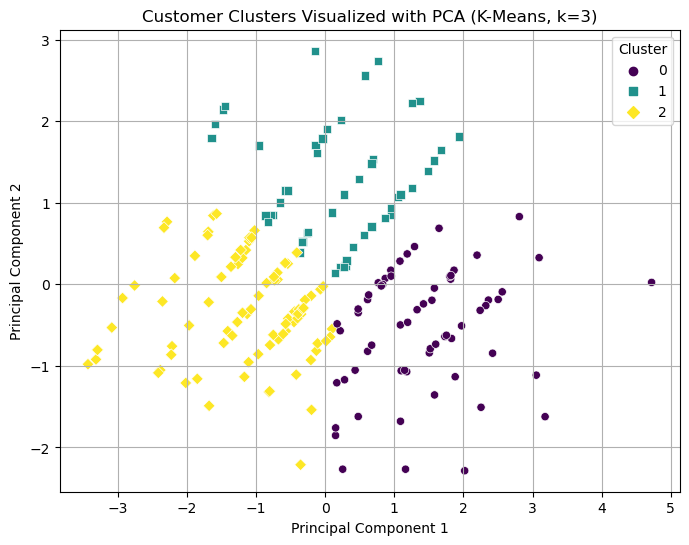

In [56]:
# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Cluster', data=pca_df, palette='viridis', style='Cluster', markers=['o', 's', 'D'])
plt.title('Customer Clusters Visualized with PCA (K-Means, k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# Now, let's iterate through different values of k  for KMeans and record the metrics and visualisations .



In [57]:
silhouette_scores = []
db_index_scores = []
inertia_values = []
range_n_clusters = range(2, 11) # Clusters from 2 to 10


In [58]:
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # explicitly set n_init
    cluster_labels = kmeans.fit_predict(customer_similarity_features)
    silhouette_avg = silhouette_score(customer_similarity_features, cluster_labels)
    db_index = davies_bouldin_score(customer_similarity_features, cluster_labels)
    inertia = kmeans.inertia_


In [59]:
    silhouette_scores.append(silhouette_avg)
    db_index_scores.append(db_index)
    inertia_values.append(inertia)

    print(f"For n_clusters = {n_clusters}")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Davies-Bouldin Index: {db_index:.4f}")
    print(f"K-Means Inertia: {inertia:.4f}")
    print("-" * 50)



For n_clusters = 10
Silhouette Score: 0.2709
Davies-Bouldin Index: 1.2051
K-Means Inertia: 201.8579
--------------------------------------------------


In [60]:
silhouette_scores = []
db_index_scores = []
inertia_values = []
range_n_clusters = range(2, 11) # Clusters from 2 to 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # explicitly set n_init
    cluster_labels = kmeans.fit_predict(customer_similarity_features)
    silhouette_avg = silhouette_score(customer_similarity_features, cluster_labels)
    db_index = davies_bouldin_score(customer_similarity_features, cluster_labels)
    inertia = kmeans.inertia_

    silhouette_scores.append(silhouette_avg)
    db_index_scores.append(db_index)
    inertia_values.append(inertia)

    print(f"For n_clusters = {n_clusters}")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Davies-Bouldin Index: {db_index:.4f}")
    print(f"K-Means Inertia: {inertia:.4f}")

    print(f"Current silhouette_scores: {silhouette_scores}")  # Print list after append
    print(f"Current db_index_scores: {db_index_scores}")    # Print list after append
    print(f"Current inertia_values: {inertia_values}")      # Print list after append

    print("-" * 50)

For n_clusters = 2
Silhouette Score: 0.2884
Davies-Bouldin Index: 1.3013
K-Means Inertia: 489.0600
Current silhouette_scores: [0.2883527223813774]
Current db_index_scores: [1.3012801888750594]
Current inertia_values: [489.06002446659966]
--------------------------------------------------
For n_clusters = 3
Silhouette Score: 0.2545
Davies-Bouldin Index: 1.2953
K-Means Inertia: 395.0831
Current silhouette_scores: [0.2883527223813774, 0.2545262614429914]
Current db_index_scores: [1.3012801888750594, 1.29534298622608]
Current inertia_values: [489.06002446659966, 395.08305086327823]
--------------------------------------------------
For n_clusters = 4
Silhouette Score: 0.2220
Davies-Bouldin Index: 1.3486
K-Means Inertia: 335.2448
Current silhouette_scores: [0.2883527223813774, 0.2545262614429914, 0.2219570183481934]
Current db_index_scores: [1.3012801888750594, 1.29534298622608, 1.3485994090966689]
Current inertia_values: [489.06002446659966, 395.08305086327823, 335.2447601386445]
---------

In [61]:

kmeans_optimal_k = KMeans(n_clusters=3, random_state=42, n_init=10)  # Using k=3
customer_features_scaled_df['Cluster'] = kmeans_optimal_k.fit_predict(customer_similarity_features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(customer_similarity_features)
pca_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'], index=customer_features_scaled_df.index)
pca_df['Cluster'] = customer_features_scaled_df['Cluster']




In [65]:
cluster_centers = pd.DataFrame(kmeans_optimal_k.cluster_centers_, columns=customer_similarity_features.columns)

cluster_centers_unscaled = scaler.inverse_transform(cluster_centers[['TransactionFrequency', 'AvgTransactionValue', 'TotalTransactionValue']])
cluster_centers_unscaled_df = pd.DataFrame(cluster_centers_unscaled, columns=numerical_features)

cluster_centers_final = pd.concat([cluster_centers[['Region_Asia', 'Region_Europe', 'Region_North America', 'Region_South America']], cluster_centers_unscaled_df], axis=1)

print("Cluster Centers (Unscaled Numerical Features):\n", cluster_centers_final)

Cluster Centers (Unscaled Numerical Features):
    Region_Asia  Region_Europe  Region_North America  Region_South America  \
0     0.253968       0.190476              0.222222              0.333333   
1     0.220000       0.280000              0.240000              0.260000   
2     0.197674       0.279070              0.232558              0.290698   

   TransactionFrequency  AvgTransactionValue  TotalTransactionValue  
0              7.523810           717.383745            5341.965873  
1              3.760000           953.560257            3556.947800  
2              3.930233           511.107761            2041.910698  
